In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager,rc

pd.options.display.float_format = '{:.5f}'.format

## Ⅰ. 2023년 현재 기준 대학 진학 인구 및 대학 분석

### 1. 지역별로 현재 대학 진학이 가능한 연령(20세)을 확인하자. 

In [3]:
df_ = pd.read_csv('https://raw.githubusercontent.com/seyeon-shijuan/birth-rate-to-universities-visualization/master/data/age_18_by_city.csv', index_col=0, encoding='cp949')
df_

,2023년01월_계_총인구수,2023년01월_계_연령구간인구수,2023년01월_계_18세,2023년01월_남_총인구수,2023년01월_남_연령구간인구수,2023년01월_남_18세,2023년01월_여_총인구수,2023년01월_여_연령구간인구수,2023년01월_여_18세
행정구역,,,,,,,,,
전국,"51,430,018","468,291","468,291","25,631,538","242,177","242,177","25,798,480","226,114","226,114"
서울특별시,"9,424,873","77,852","77,852","4,567,739","39,916","39,916","4,857,134","37,936","37,936"
부산광역시,"3,316,107","26,446","26,446","1,618,749","13,600","13,600","1,697,358","12,846","12,846"
대구광역시,"2,362,880","21,967","21,967","1,162,217","11,555","11,555","1,200,663","10,412","10,412"
인천광역시,"2,969,502","26,793","26,793","1,486,300","13,754","13,754","1,483,202","13,039","13,039"
광주광역시,"1,429,816","15,251","15,251","706,724","7,895","7,895","723,092","7,356","7,356"
대전광역시,"1,445,806","14,602","14,602","721,037","7,584","7,584","724,769","7,018","7,018"
울산광역시,"1,110,074","10,626","10,626","570,113","5,633","5,633","539,961","4,993","4,993"
세종특별자치시,"384,496","4,070","4,070","191,769","2,007","2,007","192,727","2,063","2,063"


In [4]:
# 그래프1) 지역별 18세 막대그래프

In [5]:
# object 타입의 데이터를 int 타입으로 변환
for i in range(df_.shape[0]):
    for j in range(df_.shape[1]):
        if df_.dtypes[j] == "object":
            value = df_.iat[i, j]
            value = value.replace(",", "")
            value = int(value)
            df_.iat[i, j] = value

# 변환된 데이터를 csv 파일로 저장
df_.to_csv("converted_data.csv", index=False)

In [6]:
df_.drop(['전국'], inplace=True)
df_

,2023년01월_계_총인구수,2023년01월_계_연령구간인구수,2023년01월_계_18세,2023년01월_남_총인구수,2023년01월_남_연령구간인구수,2023년01월_남_18세,2023년01월_여_총인구수,2023년01월_여_연령구간인구수,2023년01월_여_18세
행정구역,,,,,,,,,
서울특별시,9424873,77852,77852,4567739,39916,39916,4857134,37936,37936
부산광역시,3316107,26446,26446,1618749,13600,13600,1697358,12846,12846
대구광역시,2362880,21967,21967,1162217,11555,11555,1200663,10412,10412
인천광역시,2969502,26793,26793,1486300,13754,13754,1483202,13039,13039
광주광역시,1429816,15251,15251,706724,7895,7895,723092,7356,7356
대전광역시,1445806,14602,14602,721037,7584,7584,724769,7018,7018
울산광역시,1110074,10626,10626,570113,5633,5633,539961,4993,4993
세종특별자치시,384496,4070,4070,191769,2007,2007,192727,2063,2063
경기도,13596091,129441,129441,6842226,66257,66257,6753865,63184,63184


In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
plt.rc('font', family='NanumBarunGothic') 

In [9]:
youth = df_.iloc[:, 2]
print(youth)


행정구역
서울특별시       77852
부산광역시       26446
대구광역시       21967
인천광역시       26793
광주광역시       15251
대전광역시       14602
울산광역시       10626
세종특별자치시      4070
경기도        129441
강원도         13764
충청북도        14535
충청남도        19758
전라북도        17199
전라남도        16253
경상북도        21863
경상남도        31218
제주특별자치도      6653
Name: 2023년01월_계_18세, dtype: object


In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울특별시 to 제주특별자치도
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   2023년01월_계_총인구수     17 non-null     object
 1   2023년01월_계_연령구간인구수  17 non-null     object
 2   2023년01월_계_18세      17 non-null     object
 3   2023년01월_남_총인구수     17 non-null     object
 4   2023년01월_남_연령구간인구수  17 non-null     object
 5   2023년01월_남_18세      17 non-null     object
 6   2023년01월_여_총인구수     17 non-null     object
 7   2023년01월_여_연령구간인구수  17 non-null     object
 8   2023년01월_여_18세      17 non-null     object
dtypes: object(9)
memory usage: 1.3+ KB


<BarContainer object of 17 artists>

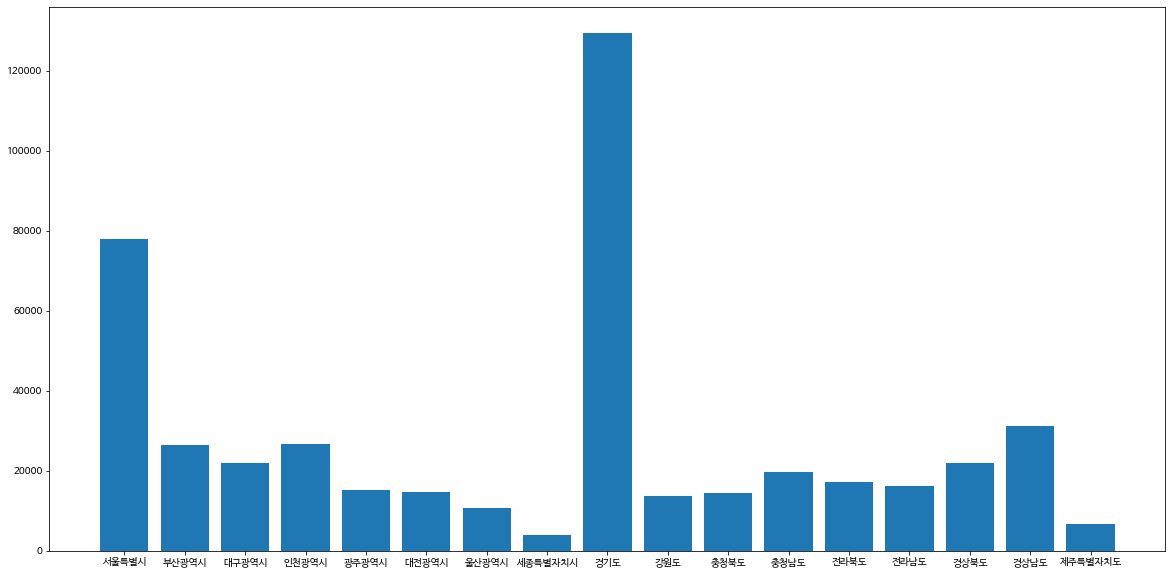

In [11]:
plt.figure(figsize=(20,10))
plt.bar(df_.index,youth)


In [12]:
# 그래프2) 지역별 18세 지도 버블차트

In [13]:
!pip install folium -q
import folium
from folium import Marker
from folium import plugins
from folium import GeoJson
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go

plt.rcParams['figure.dpi'] = 300

In [14]:
df_.insert(3,'latitude',['37.56','35.17','35.87','37.45','35.15','36.35','35.53','36.48','37.56','37.55','36.62','36.55','35.71','34.81','36.24','35.25','33.36'])
df_

,2023년01월_계_총인구수,2023년01월_계_연령구간인구수,2023년01월_계_18세,latitude,2023년01월_남_총인구수,2023년01월_남_연령구간인구수,2023년01월_남_18세,2023년01월_여_총인구수,2023년01월_여_연령구간인구수,2023년01월_여_18세
행정구역,,,,,,,,,,
서울특별시,9424873,77852,77852,37.56,4567739,39916,39916,4857134,37936,37936
부산광역시,3316107,26446,26446,35.17,1618749,13600,13600,1697358,12846,12846
대구광역시,2362880,21967,21967,35.87,1162217,11555,11555,1200663,10412,10412
인천광역시,2969502,26793,26793,37.45,1486300,13754,13754,1483202,13039,13039
광주광역시,1429816,15251,15251,35.15,706724,7895,7895,723092,7356,7356
대전광역시,1445806,14602,14602,36.35,721037,7584,7584,724769,7018,7018
울산광역시,1110074,10626,10626,35.53,570113,5633,5633,539961,4993,4993
세종특별자치시,384496,4070,4070,36.48,191769,2007,2007,192727,2063,2063
경기도,13596091,129441,129441,37.56,6842226,66257,66257,6753865,63184,63184


In [15]:
df_.insert(4,'longitude',['126.97','129.07',' 128.60',' 126.70',' 126.85','127.38',' 129.31',' 127.28','127.19','128.20','127.92','126.77','127.14','126.89','128.66','128.66','126.54'])
df_

,2023년01월_계_총인구수,2023년01월_계_연령구간인구수,2023년01월_계_18세,latitude,longitude,2023년01월_남_총인구수,2023년01월_남_연령구간인구수,2023년01월_남_18세,2023년01월_여_총인구수,2023년01월_여_연령구간인구수,2023년01월_여_18세
행정구역,,,,,,,,,,,
서울특별시,9424873,77852,77852,37.56,126.97,4567739,39916,39916,4857134,37936,37936
부산광역시,3316107,26446,26446,35.17,129.07,1618749,13600,13600,1697358,12846,12846
대구광역시,2362880,21967,21967,35.87,128.60,1162217,11555,11555,1200663,10412,10412
인천광역시,2969502,26793,26793,37.45,126.70,1486300,13754,13754,1483202,13039,13039
광주광역시,1429816,15251,15251,35.15,126.85,706724,7895,7895,723092,7356,7356
대전광역시,1445806,14602,14602,36.35,127.38,721037,7584,7584,724769,7018,7018
울산광역시,1110074,10626,10626,35.53,129.31,570113,5633,5633,539961,4993,4993
세종특별자치시,384496,4070,4070,36.48,127.28,191769,2007,2007,192727,2063,2063
경기도,13596091,129441,129441,37.56,127.19,6842226,66257,66257,6753865,63184,63184


In [16]:
df_.reset_index(inplace=True)
df_

,행정구역,2023년01월_계_총인구수,2023년01월_계_연령구간인구수,2023년01월_계_18세,latitude,longitude,2023년01월_남_총인구수,2023년01월_남_연령구간인구수,2023년01월_남_18세,2023년01월_여_총인구수,2023년01월_여_연령구간인구수,2023년01월_여_18세
0,서울특별시,9424873,77852,77852,37.56,126.97,4567739,39916,39916,4857134,37936,37936
1,부산광역시,3316107,26446,26446,35.17,129.07,1618749,13600,13600,1697358,12846,12846
2,대구광역시,2362880,21967,21967,35.87,128.60,1162217,11555,11555,1200663,10412,10412
3,인천광역시,2969502,26793,26793,37.45,126.70,1486300,13754,13754,1483202,13039,13039
4,광주광역시,1429816,15251,15251,35.15,126.85,706724,7895,7895,723092,7356,7356
5,대전광역시,1445806,14602,14602,36.35,127.38,721037,7584,7584,724769,7018,7018
6,울산광역시,1110074,10626,10626,35.53,129.31,570113,5633,5633,539961,4993,4993
7,세종특별자치시,384496,4070,4070,36.48,127.28,191769,2007,2007,192727,2063,2063
8,경기도,13596091,129441,129441,37.56,127.19,6842226,66257,66257,6753865,63184,63184
9,강원도,1535373,13764,13764,37.55,128.20,772297,7194,7194,763076,6570,6570


In [17]:
df_[['행정구역','2023년01월_계_18세','latitude','longitude']]

,행정구역,2023년01월_계_18세,latitude,longitude
0,서울특별시,77852,37.56,126.97
1,부산광역시,26446,35.17,129.07
2,대구광역시,21967,35.87,128.60
3,인천광역시,26793,37.45,126.70
4,광주광역시,15251,35.15,126.85
5,대전광역시,14602,36.35,127.38
6,울산광역시,10626,35.53,129.31
7,세종특별자치시,4070,36.48,127.28
8,경기도,129441,37.56,127.19
9,강원도,13764,37.55,128.20


In [18]:
mapdata = df_[['행정구역','2023년01월_계_18세','latitude','longitude']]
mapdata

,행정구역,2023년01월_계_18세,latitude,longitude
0,서울특별시,77852,37.56,126.97
1,부산광역시,26446,35.17,129.07
2,대구광역시,21967,35.87,128.60
3,인천광역시,26793,37.45,126.70
4,광주광역시,15251,35.15,126.85
5,대전광역시,14602,36.35,127.38
6,울산광역시,10626,35.53,129.31
7,세종특별자치시,4070,36.48,127.28
8,경기도,129441,37.56,127.19
9,강원도,13764,37.55,128.20


In [19]:
mapdata_new = mapdata.rename(columns={'2023년01월_계_18세': 'youth'})
mapdata_new

,행정구역,youth,latitude,longitude
0,서울특별시,77852,37.56,126.97
1,부산광역시,26446,35.17,129.07
2,대구광역시,21967,35.87,128.60
3,인천광역시,26793,37.45,126.70
4,광주광역시,15251,35.15,126.85
5,대전광역시,14602,36.35,127.38
6,울산광역시,10626,35.53,129.31
7,세종특별자치시,4070,36.48,127.28
8,경기도,129441,37.56,127.19
9,강원도,13764,37.55,128.20


In [20]:
df_m = mapdata_new.groupby('행정구역').agg({'youth':'mean',
                                    'latitude':'mean',
                                  'longitude':'mean'
                                  })
df_m

,youth,latitude,longitude
행정구역,,,
강원도,13764.00000,37.55000,128.20000
경기도,129441.00000,37.56000,127.19000
경상남도,31218.00000,35.25000,128.66000
경상북도,21863.00000,36.24000,128.66000
광주광역시,15251.00000,35.15000,126.85000
대구광역시,21967.00000,35.87000,128.60000
대전광역시,14602.00000,36.35000,127.38000
부산광역시,26446.00000,35.17000,129.07000
서울특별시,77852.00000,37.56000,126.97000


In [78]:
m = folium.Map(location=[37.541, 126.986], tiles='Cartodb Positron', 
               zoom_start=11, width="%100", 
               height="%100")

In [80]:
locations = list(zip(mapdata_new.latitude, mapdata_new.longitude))
for i in range(len(locations)):
    row = mapdata_new.iloc[i]
    folium.CircleMarker(location=locations[i], # 버블을 표현
                        radius= float(row.youth/5000), # 버블 크기 설정
                        fill_color="blue"
                       ).add_to(m)

m

### 2. 전국 대학의 분포를 확인하자.

In [23]:
df_univ = pd.read_csv('https://raw.githubusercontent.com/seyeon-shijuan/birth-rate-to-universities-visualization/master/data/university_list_2022.csv', index_col=0, encoding='UTF8')
df_univ.head(5)

,학교코드,학교명,본분교,학제,지역,설립구분,관련법령,법인명,학교상태,중문학교명,영문학교명,주소,영문주소,중문주소,우편번호,학교개교일,학교홈페이지,총장(대학원장)명,학교대표번호,학교대표팩스번호
학교구분,,,,,,,,,,,,,,,,,,,,
대학,1,강릉원주대학교,본교,대학교,강원,국립,고등교육법,해당없음,기존,国立江陵原州大学,Gangneung Wonju National University,"강원도 강릉시 죽헌길 7 (지변동, 강릉원주대학교)","7, Jukheon-gil, Gangneung-si, Gangwon-do, Repu...","7, Jukheon-gil, Gangneung-si, Gangwon-do, Repu...",25457.00000,1979-03-01,www.gwnu.ac.kr,반선섭,033-642-7001,033-643-7110
대학,2,강릉원주대학교,제2캠퍼스,대학교,강원,국립,고등교육법,해당없음,기존,国立江陵原州大学,Gangneung Wonju National University,"강원도 원주시 흥업면 남원로 150 (흥업리, 강릉원주대학교원주캠퍼스)","150, Namwon-ro, Heungeop-myeon, Wonju-si, Gang...","150, Namwon-ro, Heungeop-myeon, Wonju-si, Gang...",26403.00000,2007-03-01,www.gwnu.ac.kr,반선섭,033-760-8020,033-760-8029
대학,3,강원대학교,본교,대학교,강원,국립,고등교육법,해당없음,기존,江原大学校,Kangwon National University,"강원도 춘천시 강원대학길 1 (효자동, 강원대학교)","1, Gangwondaehak-gil, Chuncheon-si, Gangwon-do...","1, Gangwondaehak-gil, Chuncheon-si, Gangwon-do...",24341.00000,1970-03-01,www.kangwon.ac.kr/,김헌영,033-250-6114,033-251-9556
대학,4,강원대학교,제2캠퍼스,대학교,강원,국립,고등교육법,해당없음,기존,江原大学校,Kangwon National University,"강원도 삼척시 중앙로 346 (교동, 강원대학교삼척캠퍼스)","346, Jungang-ro, Samcheok-si, Gangwon-do, Repu...","346, Jungang-ro, Samcheok-si, Gangwon-do, Repu...",25913.00000,2006-03-01,www.kangwon.ac.kr/,김헌영,033-570-6114,033-572-8620
대학,5,경북대학교,본교,대학교,대구,국립,고등교육법,해당없음,기존,庆北大学校,Kyungpook National University,"대구광역시 북구 대학로 80 (산격동, 경북대학교)","80, Daehak-ro, Buk-gu, Daegu, Republic of Korea","80, Daehak-ro, Buk-gu, Daegu, Republic of Korea",41566.00000,1946-05-28,www.knu.ac.kr,홍원화,053-950-5114,053-950-2149


In [24]:
df_univ.reset_index(inplace=True)

In [28]:
univ_df = df_univ[df_univ['학교구분']=='대학']
univ_df

,학교구분,학교코드,학교명,본분교,학제,지역,설립구분,관련법령,법인명,학교상태,...,영문학교명,주소,영문주소,중문주소,우편번호,학교개교일,학교홈페이지,총장(대학원장)명,학교대표번호,학교대표팩스번호
0,대학,1,강릉원주대학교,본교,대학교,강원,국립,고등교육법,해당없음,기존,...,Gangneung Wonju National University,"강원도 강릉시 죽헌길 7 (지변동, 강릉원주대학교)","7, Jukheon-gil, Gangneung-si, Gangwon-do, Repu...","7, Jukheon-gil, Gangneung-si, Gangwon-do, Repu...",25457.00000,1979-03-01,www.gwnu.ac.kr,반선섭,033-642-7001,033-643-7110
1,대학,2,강릉원주대학교,제2캠퍼스,대학교,강원,국립,고등교육법,해당없음,기존,...,Gangneung Wonju National University,"강원도 원주시 흥업면 남원로 150 (흥업리, 강릉원주대학교원주캠퍼스)","150, Namwon-ro, Heungeop-myeon, Wonju-si, Gang...","150, Namwon-ro, Heungeop-myeon, Wonju-si, Gang...",26403.00000,2007-03-01,www.gwnu.ac.kr,반선섭,033-760-8020,033-760-8029
2,대학,3,강원대학교,본교,대학교,강원,국립,고등교육법,해당없음,기존,...,Kangwon National University,"강원도 춘천시 강원대학길 1 (효자동, 강원대학교)","1, Gangwondaehak-gil, Chuncheon-si, Gangwon-do...","1, Gangwondaehak-gil, Chuncheon-si, Gangwon-do...",24341.00000,1970-03-01,www.kangwon.ac.kr/,김헌영,033-250-6114,033-251-9556
3,대학,4,강원대학교,제2캠퍼스,대학교,강원,국립,고등교육법,해당없음,기존,...,Kangwon National University,"강원도 삼척시 중앙로 346 (교동, 강원대학교삼척캠퍼스)","346, Jungang-ro, Samcheok-si, Gangwon-do, Repu...","346, Jungang-ro, Samcheok-si, Gangwon-do, Repu...",25913.00000,2006-03-01,www.kangwon.ac.kr/,김헌영,033-570-6114,033-572-8620
4,대학,5,경북대학교,본교,대학교,대구,국립,고등교육법,해당없음,기존,...,Kyungpook National University,"대구광역시 북구 대학로 80 (산격동, 경북대학교)","80, Daehak-ro, Buk-gu, Daegu, Republic of Korea","80, Daehak-ro, Buk-gu, Daegu, Republic of Korea",41566.00000,1946-05-28,www.knu.ac.kr,홍원화,053-950-5114,053-950-2149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,대학,2911,을지대학교,제3캠퍼스,대학교,경기,사립,고등교육법,을지학원,기존,...,Eulji University,경기도 의정부시 동일로 712 (금오동),"712, Dongil-ro, Uijeongbu-si, Gyeonggi-do","712, Dongil-ro, Uijeongbu-si, Gyeonggi-do",11759.00000,1967-03-21,www.eulji.ac.kr,홍성희,031-951-3611,031-951-3912
1808,대학,2949,홍익대학교,제2캠퍼스,대학교,세종,사립,고등교육법,홍익학원,기존,...,Hongik University,"세종특별자치시 조치원읍 세종로 2639 (신안리, 홍익대학교세종캠퍼스)","2639, Sejong-ro, Jochiwon-eup, Sejong-si, Repu...","2639, Sejong-ro, Jochiwon-eup, Sejong-si, Repu...",30016.00000,1946-04-25,sejong.hongik.ac.kr,서종욱,044-860-2114,044-860-2238
1818,대학,2959,상명대학교,제2캠퍼스,대학교,충남,사립,고등교육법,상명학원,기존,...,Sangmyung University,"충청남도 천안시 동남구 상명대길 31 (안서동, 상명대학교천안캠퍼스)","31, Sangmyeongdae-gil, Dongnam-gu, Cheonan-si,...","31, Sangmyeongdae-gil, Dongnam-gu, Cheonan-si,...",31066.00000,1984-10-06,www.smuc.ac.kr,백웅기,041-550-5114,041-550-5032
1879,대학,3022,한국전통문화대학교,본교,대학교,충남,특별법국립,한국전통문화대학교 설치법,해당없음,기존,...,Korea National University Of Cultural Heritage,"충청남도 부여군 규암면 백제문로 367 (합정리, 한국전통문화대학교)","367, Baekjemun-ro, Gyuam-myeon, Buyeo-gun, Chu...","367, Baekjemun-ro, Gyuam-myeon, Buyeo-gun, Chu...",33115.00000,2000-04-19,www.nuch.ac.kr,김영모,041-830-7114,041-830-7020


In [31]:
loc_univ = univ_df[['학교명','주소']]
loc_univ

,학교명,주소
0,강릉원주대학교,"강원도 강릉시 죽헌길 7 (지변동, 강릉원주대학교)"
1,강릉원주대학교,"강원도 원주시 흥업면 남원로 150 (흥업리, 강릉원주대학교원주캠퍼스)"
2,강원대학교,"강원도 춘천시 강원대학길 1 (효자동, 강원대학교)"
3,강원대학교,"강원도 삼척시 중앙로 346 (교동, 강원대학교삼척캠퍼스)"
4,경북대학교,"대구광역시 북구 대학로 80 (산격동, 경북대학교)"
...,...,...
1775,을지대학교,경기도 의정부시 동일로 712 (금오동)
1808,홍익대학교,"세종특별자치시 조치원읍 세종로 2639 (신안리, 홍익대학교세종캠퍼스)"
1818,상명대학교,"충청남도 천안시 동남구 상명대길 31 (안서동, 상명대학교천안캠퍼스)"
1879,한국전통문화대학교,"충청남도 부여군 규암면 백제문로 367 (합정리, 한국전통문화대학교)"


In [ ]:
# 그래프3) 전국 대학교의 위치정보(위도, 경도)를 지도에 점으로 표시

In [ ]:
# 그래프4) 시도 별 대학 개수 막대그래프

In [32]:
area_univ = univ_df[['학교명','지역']]
area_univ

,학교명,지역
0,강릉원주대학교,강원
1,강릉원주대학교,강원
2,강원대학교,강원
3,강원대학교,강원
4,경북대학교,대구
...,...,...
1775,을지대학교,경기
1808,홍익대학교,세종
1818,상명대학교,충남
1879,한국전통문화대학교,충남


In [52]:
area_univ['대학 수'] = ''
area_univ

<ipython-input-52-6df97853fbc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_univ['대학 수'] = ''


,학교명,지역,대학 수
0,강릉원주대학교,강원,
1,강릉원주대학교,강원,
2,강원대학교,강원,
3,강원대학교,강원,
4,경북대학교,대구,
...,...,...,...
1775,을지대학교,경기,
1808,홍익대학교,세종,
1818,상명대학교,충남,
1879,한국전통문화대학교,충남,


In [81]:
area_univ_num = area_univ.groupby('지역').agg({'대학 수':'count'})

In [73]:
area_univ_num['대학 수']

지역
강원    13
경기    40
경남    12
경북    21
광주    11
대구     4
대전    15
부산    17
서울    56
세종     3
울산     2
인천     6
전남    12
전북    11
제주     2
충남    19
충북    13
Name: 대학 수, dtype: int64

<BarContainer object of 17 artists>

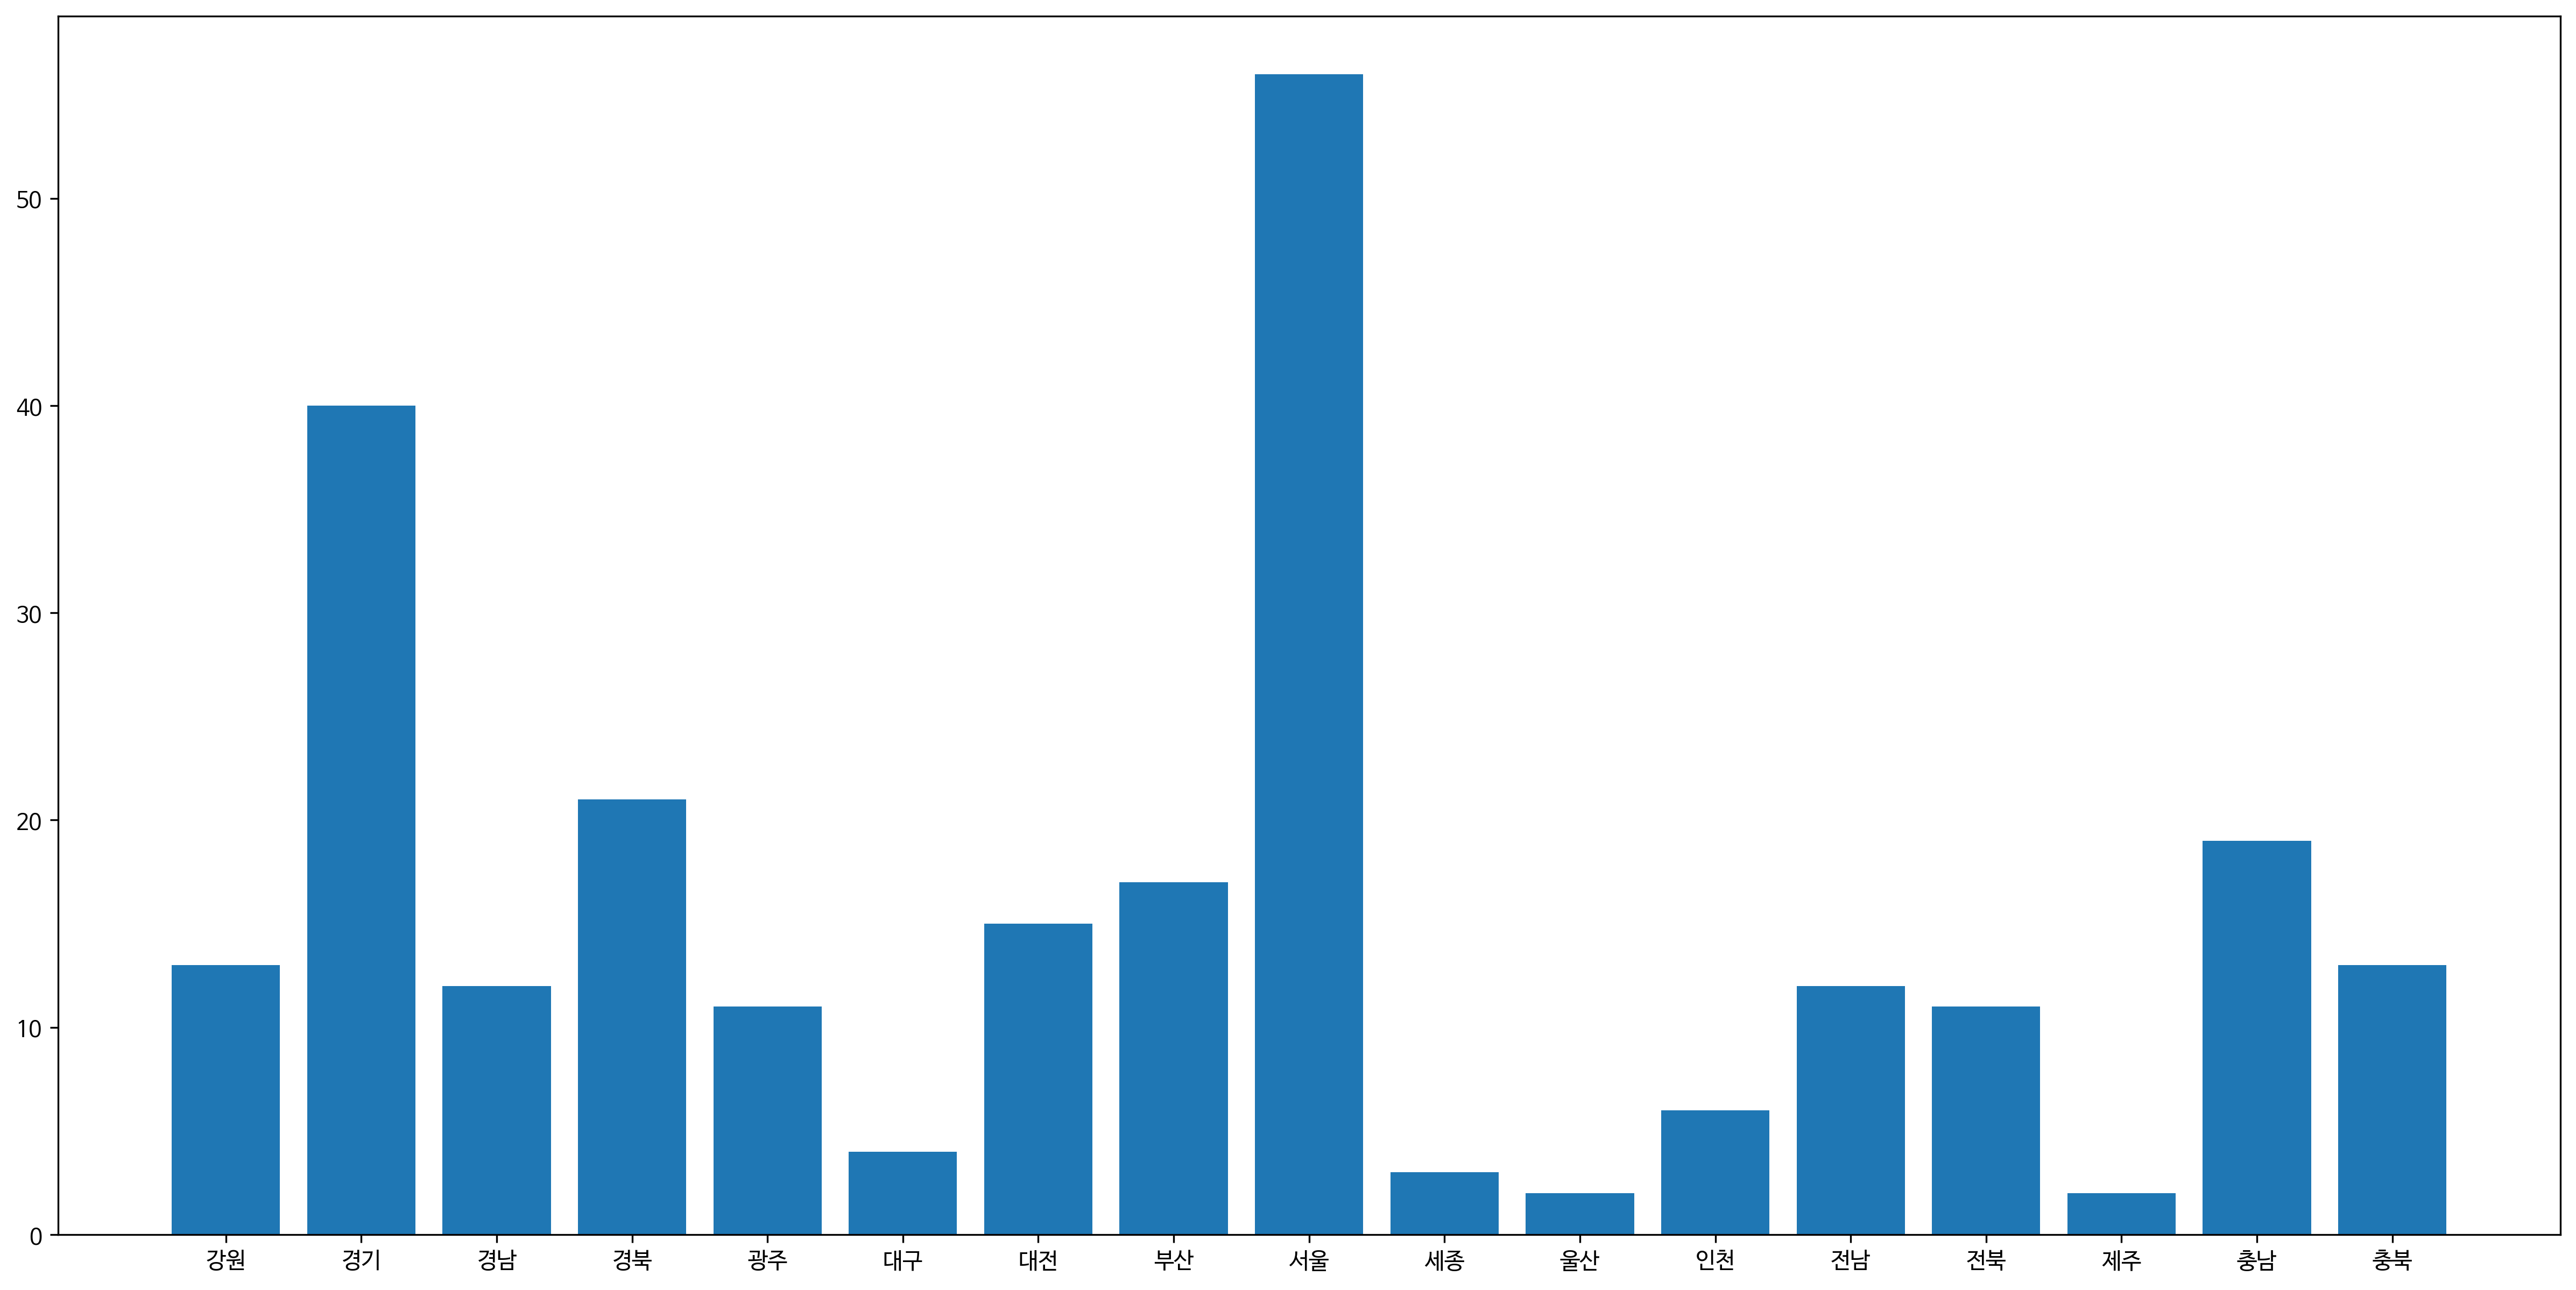

In [76]:
plt.figure(figsize=(20,10))
plt.bar(area_univ_num['대학 수'].index,area_univ_num['대학 수'])


In [68]:
# 그래프5) 전국 대학교의 위치정보(위도, 경도) + 지역별 18세 지도 버블차트